# 데이터 Feature Engineering

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#### 데이터 읽어오기

In [2]:
application = pd.read_csv('../data/application_record.csv')
credit = pd.read_csv('../data/credit_record.csv')

In [3]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [5]:
print('application :', len(application['ID']))
print('credit :',len(credit['ID']))
print('intersection :',len(set(application['ID']).intersection(set(credit['ID']))))

application : 438557
credit : 1048575
intersection : 36457


In [6]:
application['OCCUPATION_TYPE'].fillna('not_specified',inplace=True)

In [7]:
credit['STATUS'] = credit['STATUS'].map({'X': 0, 'C': 0, '0': 0, '1': 1, '2': 2,'3': 3, '4': 4, '5': 5})

In [8]:
other = credit.groupby('ID').agg({'MONTHS_BALANCE': 'count', 'STATUS': 'sum'})
other.head()

,MONTHS_BALANCE,STATUS
ID,,
5001711,4,0
5001712,19,0
5001713,22,0
5001714,15,0
5001715,60,0


In [9]:
len(other)

45985

In [10]:
other['STATUS'].value_counts()

STATUS
0      40635
1       2702
2       1045
3        489
4        284
       ...  
90         1
54         1
160        1
44         1
17         1
Name: count, Length: 80, dtype: int64

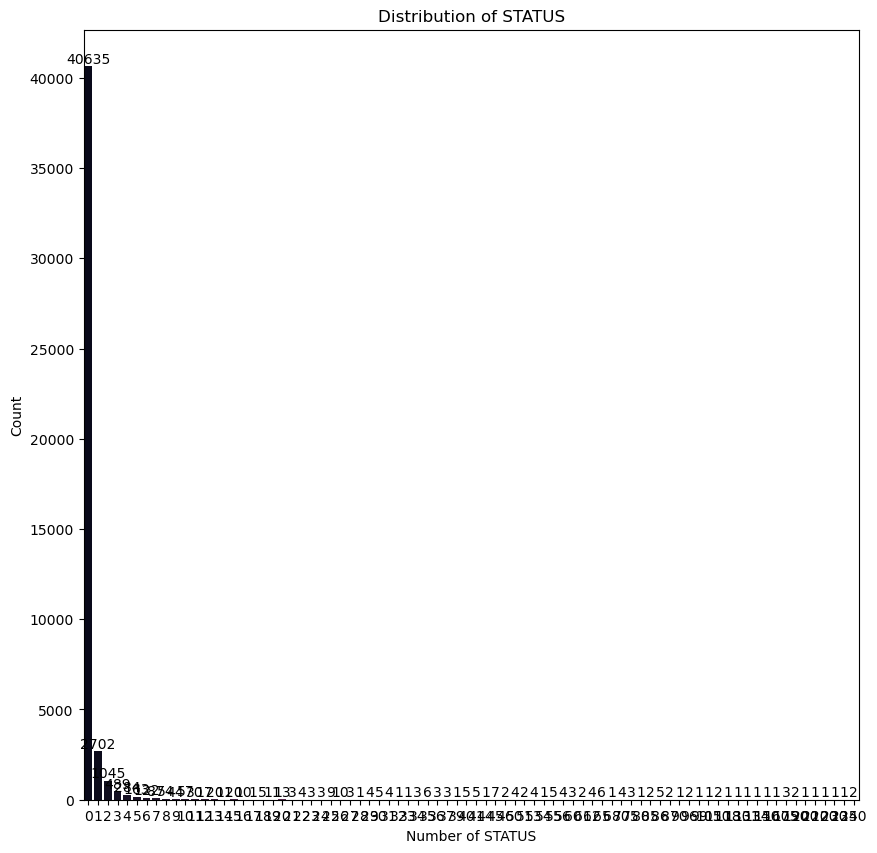

In [11]:
num = other['STATUS'].value_counts().values
label = other['STATUS'].value_counts().index
total = len(application)
plt.figure(figsize=(10,10))
ax=sns.barplot(data=other, x=label, y=num, palette='rocket')
ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()

ax.set_ylabel("Count")
ax.set_xlabel("Number of STATUS")

# Add a title
ax.set_title("Distribution of STATUS")

plt.show()

In [12]:
other['MONTHS_BALANCE'].value_counts()

MONTHS_BALANCE
8     1531
7     1457
6     1439
9     1421
12    1356
      ... 
55     260
59     242
58     238
60     234
61     222
Name: count, Length: 61, dtype: int64

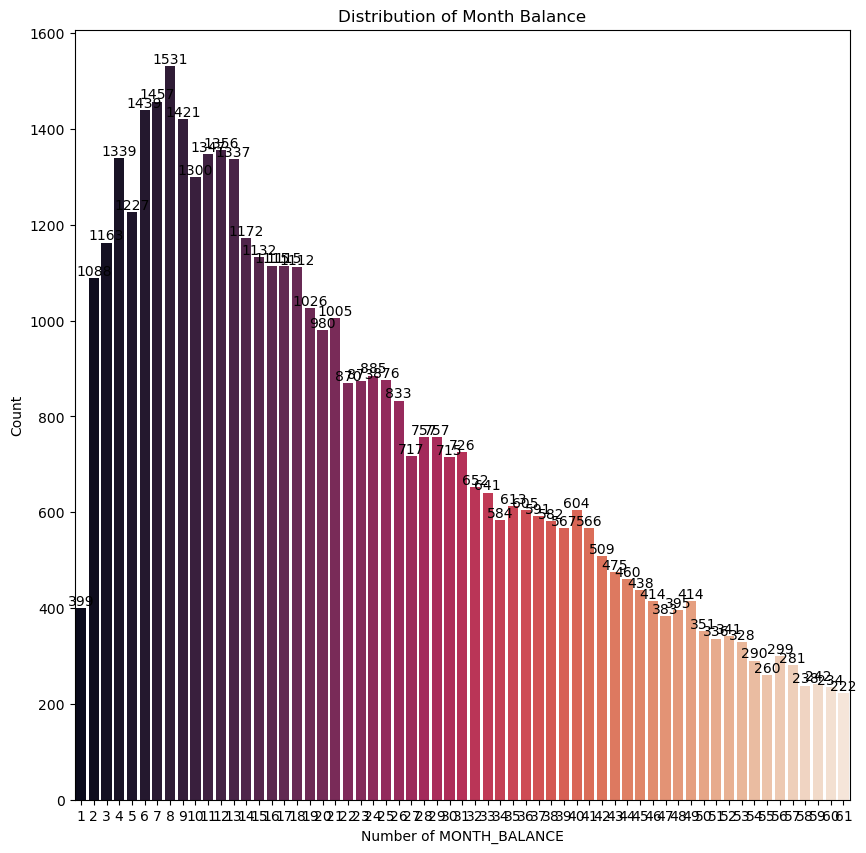

In [13]:
num = other['MONTHS_BALANCE'].value_counts().values
label = other['MONTHS_BALANCE'].value_counts().index
total = len(application)
plt.figure(figsize=(10,10))
ax=sns.barplot(data=other, x=label, y=num, palette='rocket')
ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()

ax.set_ylabel("Count")
ax.set_xlabel("Number of MONTH_BALANCE")

# Add a title
ax.set_title("Distribution of Month Balance")

plt.show()

In [14]:
other[other['STATUS'] > 0]

,MONTHS_BALANCE,STATUS
ID,,
5001718,39,2
5001720,36,7
5001757,21,1
5001786,59,1
5001792,25,3
...,...,...
5150412,18,2
5150417,27,1
5150459,52,5


In [15]:
other['high_risk'] = 'Bad'

In [36]:
len(other[(other['STATUS'] == 0) & (other['MONTHS_BALANCE'] >= 12)])

27877

In [37]:
other['high_risk'][(other['STATUS'] == 0) & (other['MONTHS_BALANCE'] >= 12)] = 'Good'

C:\Users\tmdck\AppData\Local\Temp\ipykernel_26480\69323527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other['high_risk'][(other['STATUS'] == 0) & (other['MONTHS_BALANCE'] >= 12)] = 'Good'


In [38]:
other['high_risk'].value_counts()

high_risk
Good    27877
Bad     18108
Name: count, dtype: int64

In [39]:
merge_df1 = pd.merge(application, other.drop(['STATUS', 'MONTHS_BALANCE'], axis=1), on='ID')

In [40]:
len(merge_df1)

36457

In [41]:
merge_df1['high_risk'].value_counts()

high_risk
Good    21110
Bad     15347
Name: count, dtype: int64

In [42]:
merge_df1.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
high_risk              0
dtype: int64

In [43]:
import copy

merge_df2 = merge_df1.copy()
merge_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [24]:
merge_df2['FLAG_OWN_CAR'] = merge_df2['FLAG_OWN_CAR'].map({'Y':1, 'N':0})
merge_df2['FLAG_OWN_REALTY'] = merge_df2['FLAG_OWN_REALTY'].map({'Y':1, 'N':0})
merge_df2['DAYS_BIRTH'] = np.around(abs(merge_df2['DAYS_BIRTH']) / 365, 1)
merge_df2['high_risk'] = merge_df2['high_risk'].map({'Good':1, 'Bad':0})

In [25]:
merge_df2.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,high_risk
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.9,-4542,1,1,0,0,not_specified,2.0,0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.9,-4542,1,1,0,0,not_specified,2.0,0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.8,-1134,1,0,0,0,Security staff,2.0,1
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.4,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.4,-3051,1,0,1,1,Sales staff,1.0,0


In [26]:
merge_df2 = pd.get_dummies(merge_df2, drop_first=True)
merge_df2

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified
0,5008804,1,1,0,427500.0,32.9,-4542,1,1,0,...,False,False,False,False,False,False,False,False,False,True
1,5008805,1,1,0,427500.0,32.9,-4542,1,1,0,...,False,False,False,False,False,False,False,False,False,True
2,5008806,1,1,0,112500.0,58.8,-1134,1,0,0,...,False,False,False,False,False,False,False,True,False,False
3,5008808,0,1,0,270000.0,52.4,-3051,1,0,1,...,False,False,False,False,False,True,False,False,False,False
4,5008809,0,1,0,270000.0,52.4,-3051,1,0,1,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,0,315000.0,47.5,-2420,1,0,0,...,False,True,False,False,False,False,False,False,False,False
36453,5149834,0,1,0,157500.0,33.9,-1325,1,0,1,...,False,False,True,False,False,False,False,False,False,False
36454,5149838,0,1,0,157500.0,33.9,-1325,1,0,1,...,False,False,True,False,False,False,False,False,False,False
36455,5150049,0,1,0,283500.0,49.2,-655,1,0,0,...,False,False,False,False,False,True,False,False,False,False


#### Feature Engineering
- 일반적으로 위험에 처한 사용자는 3%여야 하므로 60일 이상 연체한 사용자들을 '나쁜' 클라이언트로 잡았다.

In [27]:
begin_month = pd.DataFrame(credit.groupby(['ID'])['MONTHS_BALANCE'].agg(min))
begin_moth = begin_month.rename(columns={'MONTHS_BALANCE': 'begin_month'})
new_application = pd.merge(application, begin_month, how='left', on='ID')
new_application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,not_specified,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,not_specified,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0


In [28]:
credit['dep_value'] = None
credit['dep_value'][credit['STATUS'] == '2'] = 'Yes'
credit['dep_value'][credit['STATUS'] == '3'] = 'Yes'
credit['dep_value'][credit['STATUS'] == '4'] = 'Yes'
credit['dep_value'][credit['STATUS'] == '5'] = 'Yes'

C:\Users\tmdck\AppData\Local\Temp\ipykernel_26480\2301334609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit['dep_value'][credit['STATUS'] == '2'] = 'Yes'
C:\Users\tmdck\AppData\Local\Temp\ipykernel_26480\2301334609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit['dep_value'][credit['STATUS'] == '3'] = 'Yes'
C:\Users\tmdck\AppData\Local\Temp\ipykernel_26480\2301334609.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [29]:
credit.head()

,ID,MONTHS_BALANCE,STATUS,dep_value
0,5001711,0,0,None
1,5001711,-1,0,None
2,5001711,-2,0,None
3,5001711,-3,0,None
4,5001712,0,0,None


In [30]:
count_dep = credit.groupby('ID').count()
count_dep['dep_value'][count_dep['dep_value'] > 0] = 'Yes'
count_dep['dep_value'][count_dep['dep_value'] == 0] = 'No'
count_dep = count_dep[['dep_value']]

new_application = pd.merge(new_application, count_dep, how='inner', on='ID')
new_application['target'] = new_application['dep_value']
new_application.loc[new_application['target'] == 'Yes', 'target'] = 1
new_application.loc[new_application['target'] == 'No', 'target'] = 0

In [31]:
print(count_dep['dep_value'].value_counts())
print(count_dep['dep_value'].value_counts(normalize=True))

dep_value
No    45985
Name: count, dtype: int64
dep_value
No    1.0
Name: proportion, dtype: float64


-> '좋은' 클라이언트와 '나쁜' 클라이언트를 약 0.98 : 0.02로 나눈 것을 확인할 수 있다.

#### Features

In [32]:
new_application.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Car', 'FLAG_OWN_REALTY': 'Reality',
                                'CNT_CHIDREN': 'ChldNo', 'AMT_INCOME_TOTAL': 'Income',
                                'NAME_EDUCATION_TYPE': 'Edutype', 'NAME_FAMILY_STATUS': 'FamilyType',
                                'NAME_HOUSING_TYPE': 'HouseType', 'FLAG_EMAIL': 'Email',
                                'NAME_INCOME_TYPE': 'IncomeType', 'FLAG_WORK_PHONE': 'Wkphone',
                                'FLAG_PHONE': 'Phone', 'CNT_FAM_MEMBERS': 'FamilySize',
                                'OCCUPATION_TYPE': 'Occupy'}, inplace=True)
new_application.head()

,ID,Gender,Car,Reality,CNT_CHILDREN,Income,IncomeType,Edutype,FamilyType,HouseType,...,DAYS_EMPLOYED,FLAG_MOBIL,Wkphone,Phone,Email,Occupy,FamilySize,MONTHS_BALANCE,dep_value,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,not_specified,2.0,-15.0,No,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,not_specified,2.0,-14.0,No,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0


In [33]:
new_application.dropna()
new_application = new_application.mask(new_application == 'NULL').dropna()